<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/10_Dimensionality_Reduction_in_Python/04_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4. Clustering in Real World

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/grocery_sales.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
sales_df = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(sales_df.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/height_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
height_df = pd.read_csv(url)
display(height_df.head())

**Manual feature extraction I**  
You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

In [ ]:
# Calculate the price from the quantity sold and revenue
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(["quantity", "revenue"], axis=1)

print(reduced_df.head())

In [ ]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(height_df[['height_1', 'height_2', 'height_3']], axis=1)

print(reduced_df.head())

principal component intuition
Forearm vs. upper arm lengths

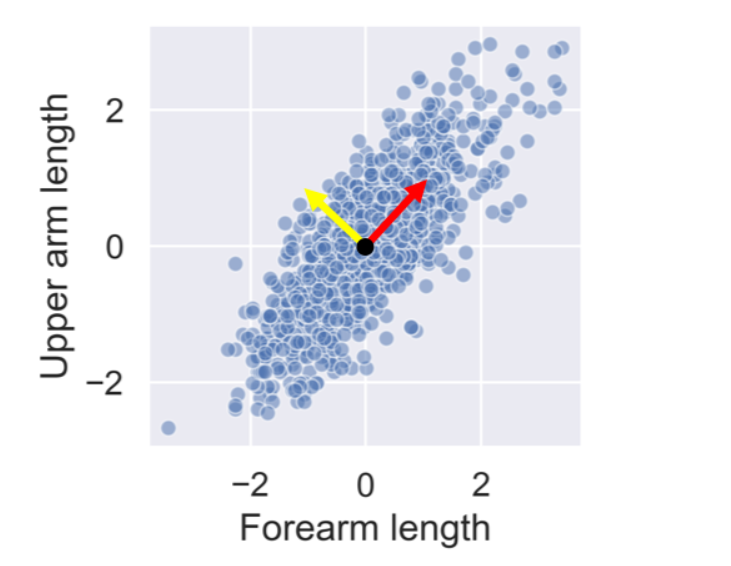

After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two vectors multiplied with a value each. These values are then called principal components.

Which of the following statements is true?


- --People with a negative component for the yellow vector have long forearms relative to their upper arms.

- People with a positive component for the yellow vector have long forearms relative to their upper arms.

- People with a negative component for the red vector have above average arm lengths.

- People with a positive component for the red vector have below average arm lengths.

### **Calculating Principal Components**  
You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as ansur_df.



In [ ]:

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/ansur_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ansur_df = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(ansur_df.head())


# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg
0,NaN,274,1432,317,222,1330,242,196,392,350,...,1683,470,325,944,243,413,1066,176,872,81.2
1,NaN,189,1446,326,205,1340,240,210,411,295,...,1593,475,283,759,181,359,1057,164,868,62.1
2,NaN,237,1369,312,222,1254,244,188,383,343,...,1569,453,311,897,218,371,1011,175,805,75.8
3,NaN,219,1411,341,220,1306,248,195,408,314,...,1580,444,299,852,219,368,1066,176,804,74.5
4,NaN,285,1360,310,203,1252,232,182,395,357,...,1698,465,348,1001,261,386,961,162,833,81.9


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

# Notice how, in contrast to the input features, none of the principal components are correlated to one another.

**PCA on a larger dataset**  
You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler(ansur_std)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)